# 필요한 패키지 다운로드

In [1]:
!pip install mxnet
!pip install gluonnlp tqdm
!pip install sentencepiece
!pip install transformers

     |████████████████████████████████| 47.3 MB 1.2 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 344 kB 34.3 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595734 sha256=76b526a19691da9e54ae18076376d262506ca99a1a4eec964de4bfd6e9813a64
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
     |████████████████████████████████| 1.2 MB 30.8 MB/s 
     |████████████████████████████████| 3.8 MB 25.4 MB/s 
     |████████████████████████████████| 895 kB 64.9 MB/s 
     |████████████████████████████████| 6.5 MB 56.7 MB/s 
     |████████████████████████████████| 596 kB 66.9 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.

In [2]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-9lwk36wj
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-9lwk36wj
     |████████████████████████████████| 132 kB 27.4 MB/s 
     |████████████████████████████████| 4.5 MB 62.3 MB/s 
     |████████████████████████████████| 79 kB 11.5 MB/s 
     |████████████████████████████████| 8.6 MB 49.2 MB/s 
     |████████████████████████████████| 127 kB 53.7 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15674 sha256=aacfe739f9674ae8c5d000c408f923ba8601254ecf0a11bf61d6846de58dd428
  Stored in directory: /tmp/pip-ephem-wheel-cache-0u7c7q8h/wheels/d3/68/ca/334747dfb038313b49cf71f84832a33372f3470d9ddfd051c0
Successfully built kobert
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does n

In [3]:
pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.4 MB/s eta 0:14:06tcmalloc: large alloc 1147494400 bytes == 0x5559010e2000 @  0x7f5159d40615 0x5558c72e53bc 0x5558c73c618a 0x5558c72e81cd 0x5558c73dab3d 0x5558c735c458 0x5558c735702f 0x5558c72e9aba 0x5558c735c2c0 0x5558c735702f 0x5558c72e9aba 0x5558c7358cd4 0x5558c73db986 0x5558c7358350 0x5558c73db986 0x5558c7358350 0x5558c73db986 0x5558c7358350 0x5558c72e9f19 0x5558c732da79 0x5558c72e8b32 0x5558c735c1dd 0x5558c735702f 0x5558c72e9aba 0x5558c7358cd4 0x5558c735702f 0x5558c72e9aba 0x5558c7357eae 0x5558c72e99da 0x5558c7358108 0x5558c735702f
     |█████████████████               | 1055.7 MB 1.4 MB/s eta 0:11:15tcmalloc: large alloc 1434370048 bytes == 0x555945738000 @  0x7f5159d40615 0x5558c72e53bc 0x5558c73c618a 0x5558c72e81cd 0x5558c73dab3d 0x5558c735c458 0x5558c735702f 0x5558c72e9aba 0x5558c735c2c0 0x5558c735702f 0x5558c72e9aba 0x5558c7358cd4 0x5558c73db986 0x5558c73583

# 데이터 불러오기

In [39]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [5]:
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

In [6]:
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
device = torch.device("cuda")
# device = torch.device("cpu")

In [9]:
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


## 데이터 전처리

In [10]:
dataset_train = []
dataset_test = []

root = "/content/drive/MyDrive/news_class9x1400/"
list = os.listdir(root)
categories = {category:i for i,category in enumerate(list)}

for cat in categories:
    # 폴더 안에 들어있는 파일들 불러오기
    files = os.listdir(root + cat)

    # 텍스트 파일을 리스트로 만들기
    for i,f in enumerate(files):
        fname = root + cat + "/" + f
        file = open(fname, "r", encoding="utf-8")
        strings = file.read()
        # train dataset은 카테고리당 1120개(80%)까지
        if i<1120:
            dataset_train.append([strings, categories[cat]])
        else:
            dataset_test.append([strings,categories[cat]])
        file.close()

print(len(dataset_train), len(dataset_test))
    

10080 2520


In [53]:
# 카테고리 확인
categories

{'ITscience': 0,
 'culture': 5,
 'economy': 1,
 'entertainment': 6,
 'health': 2,
 'life': 7,
 'politic': 8,
 'social': 3,
 'sport': 4}

뉴스 기사의 최대 길이: 4736


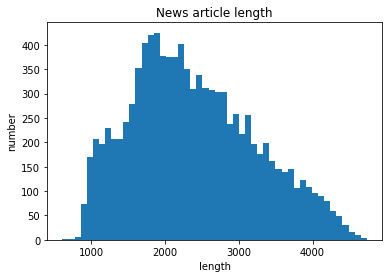

In [55]:
print('뉴스 기사의 최대 길이: {}'.format(max(len(dataset_train[i][0]) for i in range(len(dataset_train)))))

plt.hist([len(dataset_train[i][0]) for i in range(len(dataset_train))], bins = 50)
plt.xlabel('length')
plt.ylabel('number')
plt.title('News article length')
plt.show();

In [13]:
# vocab을 활용해 tokenizer 선언
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


# 데이터셋 클래스 선언

In [56]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len, pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [57]:
l1 = [len(i[0]) for i in dataset_train]
l2 = [len(i[0]) for i in dataset_test]
max(max(l1),max(l2))

4911

In [100]:
## Setting parameters
max_len = 128
batch_size = 16
warmup_ratio = 0.1
num_epochs = 10
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [101]:
data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

In [102]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5, shuffle=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


# 모델 만들기

In [72]:
# BERT-base model fine-tuning
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=9,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        #valid_length 까지만 1, 나머지는 0으로 mask를 생성
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        # return_dict=False 추가
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device), return_dict=False)

        #pooler는 CLS토큰에 대한 임베딩의 결과, 단순히 첫번째 토큰에 대한 결과가 아니라 문맥을 알아내기 위한 추가 layer를 통과한다.(아마도?)
        #임베딩의 결과에 linear layer를 통과시켜서 classification을 진행한다.
        # print(pooler.shape) batchsize * 768

        #_는 64개(max_length)의 모든 토큰에 대한 임베딩의 결과
        #단어 임베딩을 알고 싶을 때 사용할 수 있다.
        #_의 첫번째 값과 pooler와는 다른 값을 가지고 있는데 pooler는 _의 첫번째 값의 추가적으로 한번더 과정을 거친다.
        #print(_.shape) batchsize * max_len * 768

        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out) #batchsize * num_classes

In [103]:
# 모델 선언
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

In [104]:
# optimizer

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

In [105]:
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)

# 손실함수 선언
loss_fn = nn.CrossEntropyLoss()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [106]:
t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

In [107]:
scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

In [108]:
# 정확도 계산 함수
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

# 모델 훈련

1. learning_rate = 5e-5, max_len = 64, batch_size = 64

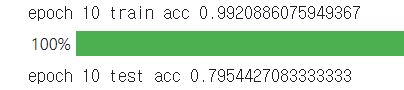

2. learning_rate = 5e-5, max_len = 64, batch_size = 32

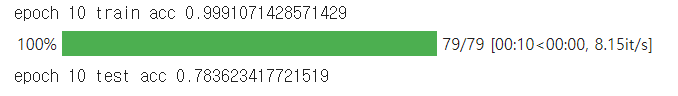

3. learning_rate = 5e-5, max_len = 128, batch_size = 32
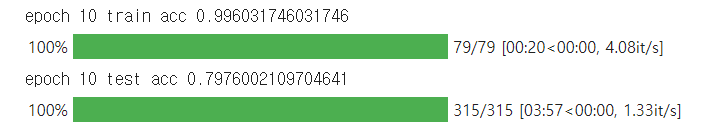



4. learning_rate = 5e-5, max_len = 128, batch_size = 16

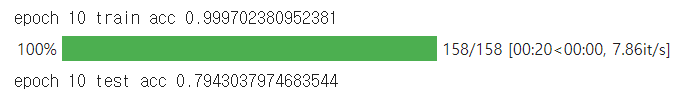

In [109]:
for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        # if batch_id % log_interval == 0:
        #     print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


  0%|          | 0/630 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 train acc 0.8782738095238095


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/158 [00:00<?, ?it/s]

epoch 1 test acc 0.7689873417721519


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 2 train acc 0.9637896825396826


  0%|          | 0/158 [00:00<?, ?it/s]

epoch 2 test acc 0.7535601265822784


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 3 train acc 0.9765873015873016


  0%|          | 0/158 [00:00<?, ?it/s]

epoch 3 test acc 0.7693829113924051


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 4 train acc 0.9846230158730159


  0%|          | 0/158 [00:00<?, ?it/s]

epoch 4 test acc 0.7863924050632911


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 5 train acc 0.9924603174603175


  0%|          | 0/158 [00:00<?, ?it/s]

epoch 5 test acc 0.7863924050632911


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 6 train acc 0.9946428571428572


  0%|          | 0/158 [00:00<?, ?it/s]

epoch 6 test acc 0.7879746835443038


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 7 train acc 0.9971230158730159


  0%|          | 0/158 [00:00<?, ?it/s]

epoch 7 test acc 0.790743670886076


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 8 train acc 0.9986111111111111


  0%|          | 0/158 [00:00<?, ?it/s]

epoch 8 test acc 0.7867879746835443


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 9 train acc 0.9990079365079365


  0%|          | 0/158 [00:00<?, ?it/s]

epoch 9 test acc 0.7931170886075949


  0%|          | 0/630 [00:00<?, ?it/s]

epoch 10 train acc 0.999702380952381


  0%|          | 0/158 [00:00<?, ?it/s]

epoch 10 test acc 0.7943037974683544


## 모델 Test

In [27]:
def softmax(vals, idx):
    valscpu = vals.cpu().detach().squeeze(0)
    a = 0
    for i in valscpu:
        a += np.exp(i)
    return ((np.exp(valscpu[idx]))/a).item() * 100

In [29]:
torch.save(model.state_dict(), "news.pt")
modelload = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)
modelload.load_state_dict(torch.load("news.pt", device))
# modelload.eval()

<All keys matched successfully>

In [30]:
def testModel(model, seq):
    cate = ['ITscience', 'economy', 'health', 'social', 'sport', 'culture', 'entertainment', 'life', 'politic']
    tmp = [seq]
    transform = nlp.data.BERTSentenceTransform(tok, max_len, pad=True, pair=False)
    tokenized = transform(tmp)

    modelload.eval()
    result = model(torch.tensor([tokenized[0]]).to(device), [tokenized[1]], torch.tensor(tokenized[2]).to(device))
    idx = result.argmax().cpu().item()
    print("뉴스의 카테고리는:", cate[idx])
    print("신뢰도는:", "{:.2f}%".format(softmax(result,idx)))

In [31]:
testModel(model, "대통령 선거 투표 날짜는 3월 9일입니다.")

뉴스의 카테고리는: politic
신뢰도는: 97.13%
